# Module 8: Deep Learning

## Lab1: Artificial Neural Networks

## Objectives
***

* Neurons, ANN and Working
* Python Libraries for Deep Learning
* Single Layer Perceptron Model
* Problems with Single Layer Perceptron
* Activation Functions
  * Sigmoid
  * ReLU
  * tanh
  * Leaky ReLU
* Multilayer Neural Network
* Backpropogation

### Neurons, ANN And Working
***

The working of artificial neurons and neural networks are inspired by the working of an acutual human brain. It is pretty obvious that the functioning of our brain is complex and so will be the work of replicating it. 

We try to train the neural networks to think/comprehend like a human brain. Algorithms expose the world through the data we provide. As we keep on training the neural network, we make the model decrease this ignorant to the world. Progress of learning is measured by the error produced by the network. 


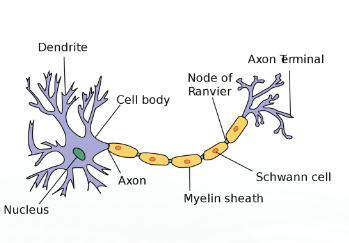


Different types of neural networks are responsible for different types of learning and solve different types of problems. These networks can be categorized into:

* **Artificial Neural Networks (ANN):** An information processing model which helps in extracting different insights from the data and trying to mimic human brain.

* **Convolution Neural Network (CNN):** They perform convolution operations on the data. They are typically used for images and text as they are very good for feature extraction.

* **Recurrent Neural Network (RNN):** They work well for sequential data like text as they consider the current input as well the input of previous timestamps hence performing well on text data where the sequence of the data is important.

* **Long Short Term Memory (LSTM):** Improved version of RNN. They also perform well on the sequential data and are widely used as they overcome the limitations of RNN.

### Python Libraries for Deep Learning
*** 

Before diving deep into the coding part, let us first get aware with some of the libraries which are used for implementing deep learning algorithms. 
 
1.) Tensorflow
* TensorFlow is a powerful open source software library developed by the Google
Brain team for deep neural networks.
* It works with all popular languages such as Python, C++, Java, R, and Go.
* Keras – a high-level neural network API that has been integrated with
TensorFlow (in 2.0, Keras became the standard API for interacting with
TensorFlow). This API specifies how software components should interact.

2.) Keras
* Keras is a beautiful API for composing building blocks to create and train deep learning models. Keras can be integrated with multiple deep learning engines including Google TensorFlow, Microsoft CNTK, Amazon MxNet, and Theano.

3.) PyTorch
* Torch is a scientific computing framework that offers broad support for machine learning algorithms. It is a Lua based deep learning framework and is used widely amongst industry giants such as Facebook, Twitter, and Google.
* As opposed to Torch, PyTorch runs on Python, which means that anyone with a basic understanding of Python can get started on building their deep learning models.

4.) mxnet
* Designed specifically for high efficiency, productivity, and flexibility, MXNet (pronounced as mix-net) is a deep learning framework that is supported by Python, R, C++, and Julia.

And similarly there are many more open-source libraries available out there which are being extensively used in deep learning. In our tutorials, we will mostly use tensorflow and keras.

### Single Layer Perceptron Model
***

Perceptron is a type of supervised learning of binary classifiers. It is a classification algorithm which makes predictions based on the linear prediction
function with a combination of the weights vector. It can handle only binary classification problems.

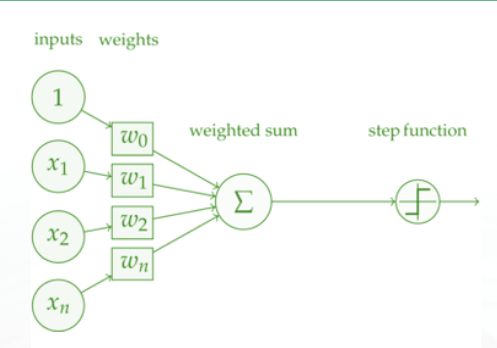


The simple working of a perceptron is shown in the above figure which is a simple perceptron which takes an input and performs a dot product with the weight matrix. The weights are equal to the number of inputs plus 1 if we have a bias also. 

After this dot product is calculated for all the inputs we calculate the sum of these inputs which passes through a step function.

This step function is typically a threshold based function in which we can set a threshold for the given output. The network output above the threshold is considered as one class or 1 or "yes" and output below the threshold is considered as another class or 0 or "no".

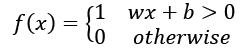

We use TensorFlow which is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.

There are three ways of creating a model in tf.keras:
* Sequential API 
* Functional API
* Model subclassing

We use MNIST dataset to demonstrate Single layer perceptron. Each MNIST image is in grayscale and consists of 28*28 pixels such as below. 

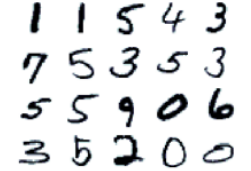


### One Hot Encoding

We are going to use a simple concept called **'One-Hot Encoding'**. In many applications it is convenient to transform categorical (non- numerical) features into numerical variables. For instance, the categorical feature "digit" with value d in [0 – 9] can be encoded into a binary vector with 10 positions, which always has 0 value except the d - th position where a 1 is present.

For example, the digit 3 can be encoded as [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. This type of representation is called One-hot encoding, or sometimes simply one-hot, and is very common in data mining when the learning algorithm is specialized in dealing with numerical functions.

We use tf.keras for loading the dataset and split it into training sets X_train, used for fine-tuning our net, and test set X_test, used for assessing the performance. 

Data is then converted into float32 to use 32-bit precision when training a neural network and normalized to the range [0,1].

In addition, we load the true labels into Y_train and Y_test respectively, and
perform a one-hot encoding on them.

In [1]:
import tensorflow as tf
from tensorflow import  keras

In [2]:
NB_CLASSES = 10
RESHAPED = 784

mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# Normalize inputs to be within in [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [4]:
# Labels have one-hot representation.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In this tutorial, we will use the simplest one, Sequential(). A **Sequential()** model is a linear pipeline (a stack) of neural network layers. 

This code fragment defines a single layer with 10 artificial neurons (defined in NB_CLASSES) that expects 784 input variables (also known as features). 

Note that the net is **"Dense"** meaning that each neuron in a layer is connected to all neurons located in the previous layer, and to all the neurons in the following layer but here we have only one layer.

Each neuron can be initialized with specific weights via the **kernel_initializer** parameter. Here we have assigned the weights to 0.

**softmax** is the activation function.

In [5]:
NB_CLASSES = 10
RESHAPED = 784


# Developing single layer neural network

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, input_shape=(RESHAPED,),kernel_initializer='zeros', name='dense_layer', activation='softmax'))
model.summary()


# Compiling the model.
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Some of the parameters of model.fit() used are:
* **EPOCHS**: Integer, Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. epochs is the number of times the model is exposed to the training set. At each iteration the optimizer tries to adjust the weights so that the objective function is minimized.

* **BATCH_SIZE**: Integer or None, Number of samples per gradient update. If unspecified, batch_size will default to 32. batch_size is the number of training instances observed before the optimizer performs a weight update; there are usually many batches per epoch.


* **VERBOSE**: 'auto', 0, 1, or 2. This is verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch. 

* **VALIDATION_SPLIT**: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. 


    


In [6]:

# Training the model

EPOCHS = 50             
BATCH_SIZE = 128       
VERBOSE = 1        
VALIDATION_SPLIT = 0.2 


model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)


Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 1.3527 - accuracy: 0.7778 - val_loss: 0.8777 - val_accuracy: 0.8457
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.7803 - accuracy: 0.8416 - val_loss: 0.6480 - val_accuracy: 0.8636
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.6350 - accuracy: 0.8570 - val_loss: 0.5548 - val_accuracy: 0.8748
Epoch 4/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5646 - accuracy: 0.8659 - val_loss: 0.5035 - val_accuracy: 0.8811
Epoch 5/50
375/375 [==============================] - 2s 5ms/step - loss: 0.5216 - accuracy: 0.8721 - val_loss: 0.4702 - val_accuracy: 0.8844
Epoch 6/50
375/375 [==============================] - 2s 4ms/step - loss: 0.4921 - accuracy: 0.8763 - val_loss: 0.4466 - val_accuracy: 0.8887
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.4702 - accuracy: 0.8800 - val_loss: 0.4290 - val_accuracy: 0.8907
Epoch 

Thus, we get and accuracy of 91.6% which is considered good. However there are some disadvantages of a single layer perceptron.

### Problems with Single Layer Perceptron
***

Let's consider a single neuron; what are the best choices for the weight w and the bias b? Ideally, we would like to provide a set of training examples and let the computer adjust the weight and the bias in such a way that the errors produced in the output are minimized.

In order to make this a bit more concrete, let's suppose that we have a set of images of cats and another separate set of images not containing cats. Suppose that each neuron receives input from the value of a single pixel in the images. 

While the computer processes those images, we would like our neuron to adjust its weights and its bias so that we have fewer and fewer images wrongly recognized. This approach seems very intuitive, but it requires a small change in the weights (or the bias) to cause only a small change in the outputs. 

Think about it: if we have a big output jump, we cannot learn progressively. After all, kids learn little by little. Unfortunately, the perceptron does not show this "little-by-little" behavior. A perceptron is either a 0 or 1, and that's a big jump that will not help in learning.

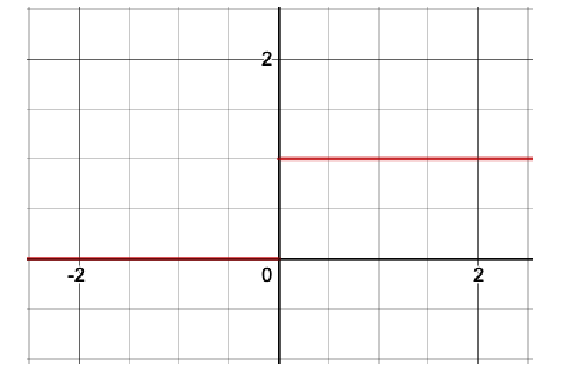

### Activation Functions
***

* Activation functions as simple mathematical functions which help in making sense of something really complicated and non-linear complex functional mapping between the input provided and the output.
* They are used to capture non-linear properties to out network. The main purpose of this function is to convert the input signal to the output signal.
* We do sum of products of the weights and the inputs which goes into the activations function. The output of the activation function is the input of the next layer and so on. 

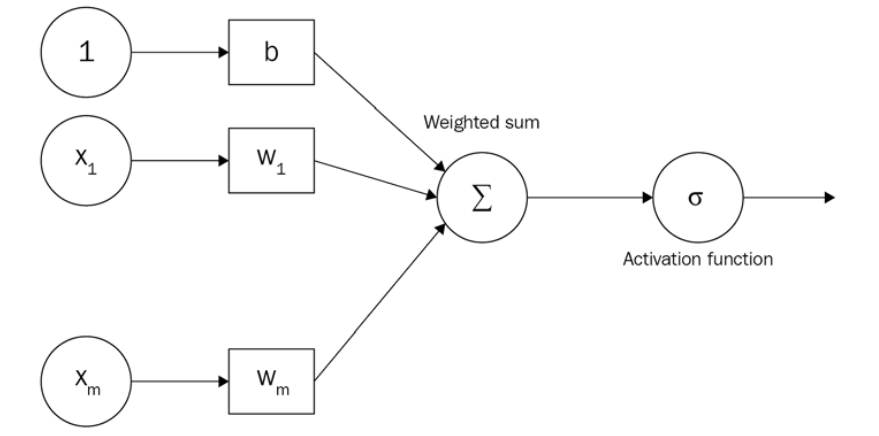


* Some of the activation functions are:
  * Sigmoid function
  * tanh function
  * ReLU function (Rectified Linear Unit)
  * ELU function (Exponential Linear Unit)
  * Leaky ReLU

Here, we will simply use simple datasets from sklearn and try to plot activation functions on them and observe the graph. 

### Sigmoid function

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

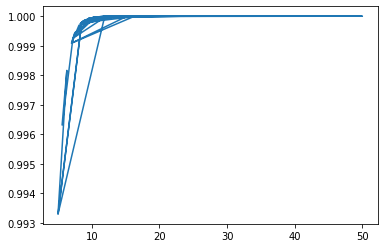

In [7]:
from sklearn.datasets import load_boston
import numpy as np


#Sigmoid function
boston = load_boston()
x = boston.target


y = (1/(1+np.exp(-x)))

import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show()

### tanh function

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

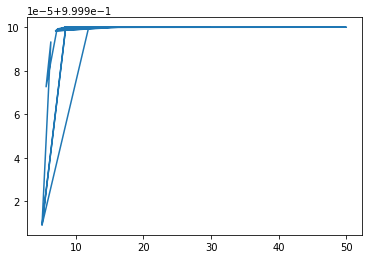

In [8]:
from sklearn.datasets import load_boston
import numpy as np

#tanh function
boston = load_boston()
x = boston.target

y = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))


plt.plot(x,y)
plt.show()

### ReLU function

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

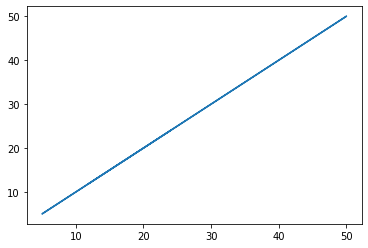

In [9]:
from sklearn.datasets import load_boston
import numpy as np

#ReLU function

boston = load_boston()
x = boston.target

y = np.maximum(0,x)


plt.plot(x,y)
plt.show()

### Leaky ReLU

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

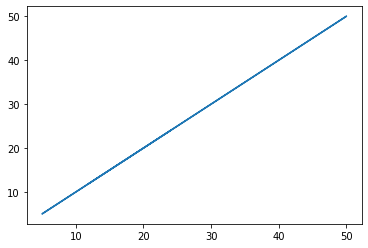

In [10]:
from sklearn.datasets import load_boston
import numpy as np

#Leaky ReLU function

boston = load_boston()
x = boston.target

y = np.maximum(0.1*x,x)


plt.plot(x,y)
plt.show()


### Multilayer Neural Network
***
Historically, "perceptron" was the name given to a model having one single linear layer, and as a consequence, if it has multiple layers, you would call it a multi-layer perceptron (MLP). 

Here, we have three layers: input, output and hidden. The input and the output layers are visible from outside, while all the other layers in the middle are hidden – hence the name hidden layers.

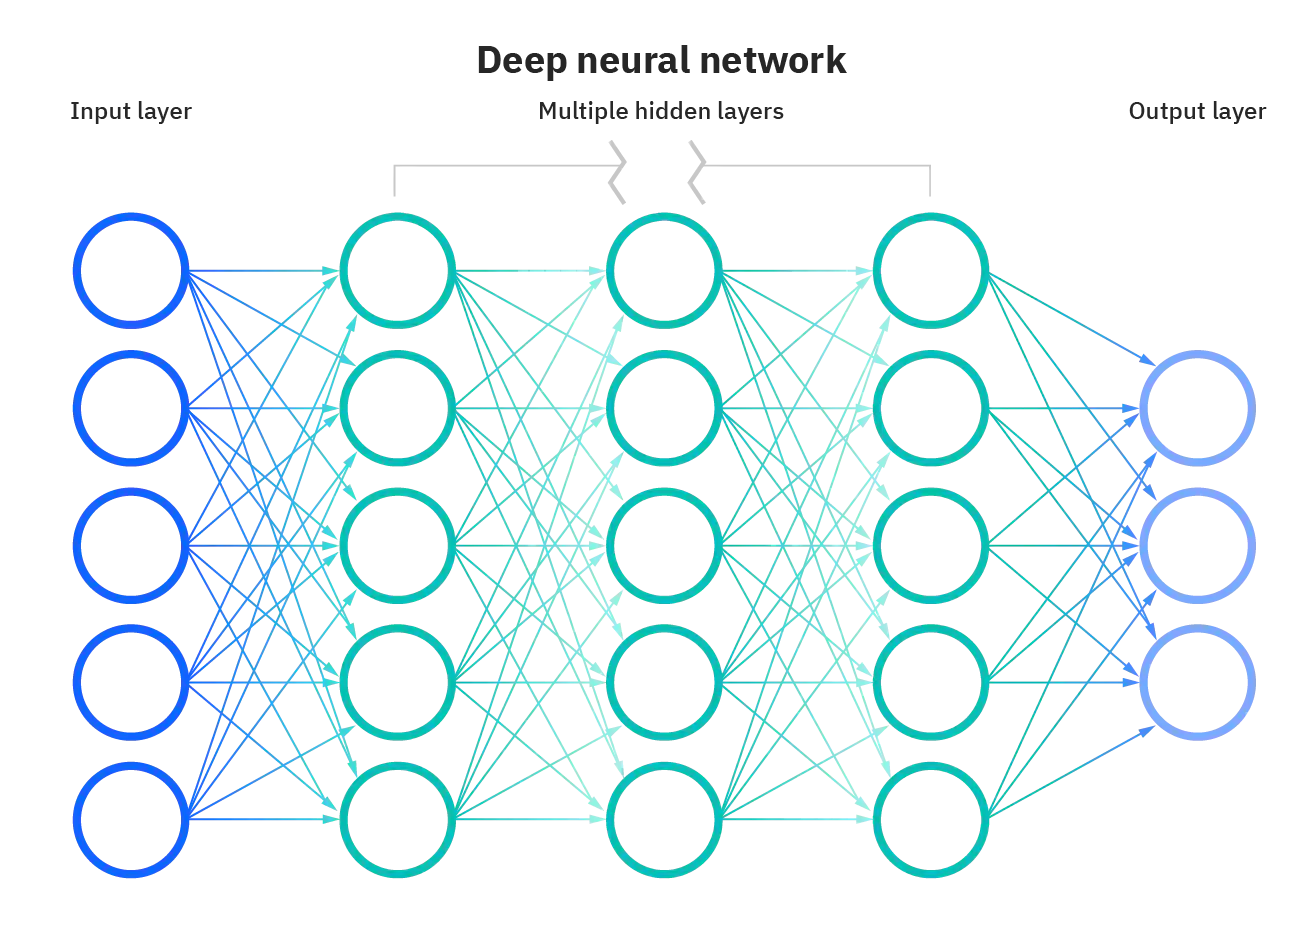

(image src: www.ibm.com/cloud/learn/neural-networks)

In this context, a single layer is simply a linear function and the Multiple layer neural network is therefore obtained by stacking multiple single layers one after the other.

As in figure, each node in the first hidden layer receives an input and "fires" (0,1) according to the values of the associated linear function. Then, the output of the first hidden layer is passed to the second layer where another linear function is applied, the results of which are passed to the final output layer consisting of one single neuron. 

It is interesting to note that this layered organization vaguely resembles
the organization of the human vision system, as we discussed earlier.

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [12]:
# Network and training parameters.
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION



In [13]:
# Loading MNIST dataset.

# You can verify that the split between train and test is 60,000, and 10,000 respectively.
# Labels have one-hot representation is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


# X_train is 60000 rows of 28x28 values; we --> reshape it to 60000 x 784.
RESHAPED = 784
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize inputs to be within in [0, 1].
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')



# One-hot representation of the labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)



60000 train samples
10000 test samples


As it can be observed from the above code that the input layer has a neuron associated to each pixel in the image for a total of 28*28=784 neurons, one for each pixel in the MNIST images.

Typically, the values associated with each pixel are normalized in the range [0,1] (which means that the intensity of each pixel is divided by 255, the maximum
intensity value). 

The output can be one of ten classes, with one class for each digit.

The final layer is a single neuron with activation function "softmax", which is a generalization of the sigmoid function.

A softmax function "squashes" a K-dimensional vector of arbitrary real values into a K-dimensional vector of real values in the range (0, 1), so that they all add up to 1.
In our case, it aggregates 10 answers provided by the previous layer with 10 neurons.
What we have just described is implemented with the following code:

In [14]:

# Build the model.

model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, 
                            input_shape=(RESHAPED,),
                            name='dense_layer', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                            name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                            name='dense_layer_3', activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN,
                            name='dense_layer_4', activation='relu'))
model.add(keras.layers.Dense(NB_CLASSES,
                            name='dense_layer_5', activation='softmax'))


# Summary of the model
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_4 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_5 (Dense)       (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model.
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Epoch 1/20
375/375 [==============================] - 3s 6ms/step - loss: 1.6734 - accuracy: 0.5488 - val_loss: 0.7638 - val_accuracy: 0.8091
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.5790 - accuracy: 0.8367 - val_loss: 0.4230 - val_accuracy: 0.8816
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3983 - accuracy: 0.8854 - val_loss: 0.3363 - val_accuracy: 0.9043
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.3312 - accuracy: 0.9041 - val_loss: 0.2930 - val_accuracy: 0.9143
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2940 - accuracy: 0.9136 - val_loss: 0.2630 - val_accuracy: 0.9246
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2682 - accuracy: 0.9220 - val_loss: 0.2491 - val_accuracy: 0.9287
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.2483 - accuracy: 0.9276 - val_loss: 0.2297 - val_accuracy: 0.9333
Epoch 

In [16]:
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9591
Test accuracy: 0.9591000080108643


Hence, we get an accuracy of 97.3% which is much better than the single layer network. 

Here we used a total of 5 layers. 

### Backpropogation 
***
Multi-layer neurons learn from training data through a process called
backpropagation. The process can be described as a way of progressively correcting mistakes as soon as they are detected.

At the beginning, all the weights have some random assignment. Then, the net is
activated for each input in the training set: values are propagated forward from the input stage through the hidden stages to the output stage where a prediction is made.

Since we know the true observed value in the training set, it is possible to calculate the error made in prediction. The key intuition for backtracking is to propagate the error back, using an appropriate optimizer algorithm such as gradient descent to adjust the neural network weights with the goal of reducing the error.

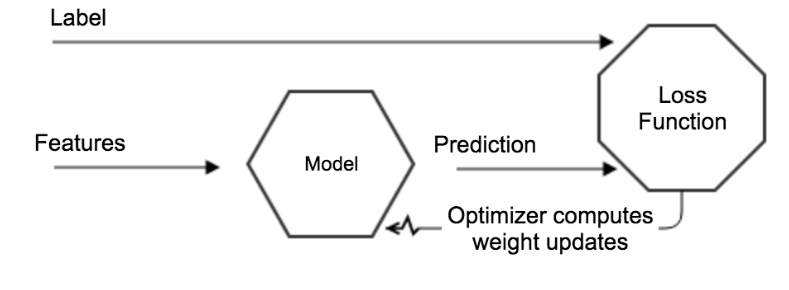

The process of forward propagation from input to output and the backward
propagation of errors is repeated several times until the error gets below a
predefined threshold. The whole process is represented in the above figure. 

The features represent the input, and the labels are used here to drive the learning process. The model is updated in such a way that the loss function is progressively minimized. 

In a neural network, what really matters is not the output of a single neuron but the collective weights adjusted in each layer. Therefore, the network
progressively adjusts its internal weights in such a way that the prediction increases the number of correctly forecasted labels. Of course, using the right set of features and having quality labeled data is fundamental in order to minimize the bias during the learning process.

In our tutorial above, backpropogation is automatically implemented by Keras inside the fit() method, so we don't need to add anything else explicity.

## Thank You !